In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("combined_data_laliga.csv")
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
0,MÁLAGA,ATHLETIC,1-0,1-0,4.4,6.0,5.7,40,60,5.0,...,14.0,9.0,3.0,0.0,0.0,1,0,0,1,2014
1,SEVILLA FC,VALENCIA,1-1,1-0,4.7,6.5,6.8,47,53,4.0,...,16.0,8.0,2.0,0.0,1.0,1,1,1,1,2014
2,GRANADA,DEPORTIVO,2-1,0-1,4.6,7.2,5.9,53,47,6.0,...,14.0,26.0,3.0,0.0,0.0,2,1,1,2,2014
3,ALMERÍA,ESPANYOL,1-1,0-0,5.6,6.9,5.5,56,44,7.0,...,20.0,9.0,3.0,1.0,0.0,1,1,1,1,2014
4,EIBAR,REAL SOCIEDAD,1-0,1-0,3.7,6.5,5.9,41,59,5.0,...,20.0,14.0,1.0,0.0,0.0,1,0,0,1,2014


In [14]:
#adding result of game to dataset
# HW - home team win
# AW - away team win
# D - draw

def game_result(df):
    if df["Away Team Goals Scored"] < df["Home Team Goals Scored"]:
        return "HW"
    elif df["Away Team Goals Scored"] > df["Home Team Goals Scored"]:
        return "AW"
    else:
        return "D"
    
df["Result"] = df.apply(game_result, axis=1)

# adding total goals column
df["Total Goals"] = df["Away Team Goals Scored"] + df["Home Team Goals Scored"]

In [15]:
#  task1) finding coorelation between ball possession and result of the game

hw_games = df[df["Result"]=="HW"]
aw_games = df[df["Result"]=="AW"]
draw_games = df[df["Result"]=="D"]
print(hw_games["Home Team Possession %"].mean())
print(aw_games["Away Team Possession %"].mean())
print(draw_games["Home Team Possession %"].mean())
print(draw_games["Away Team Possession %"].mean())

# There is no coorelation between winning the game and ball possessin.





52.24876441515651
49.43717277486911
51.37976539589443
48.62023460410557


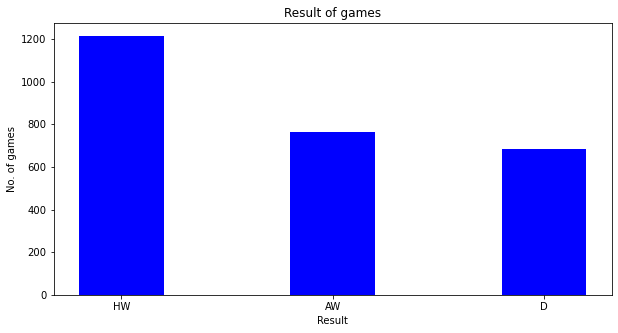

In [16]:
# task2) find the proportion of games home team won, away team won, and ended in draw
result_proportion = df.groupby("Result").size().sort_values(ascending=False)
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(list(result_proportion.index), result_proportion, color ='blue',
        width = 0.4)
 
plt.xlabel("Result")
plt.ylabel("No. of games")
plt.title("Result of games")
plt.show()

0.8741975095584403


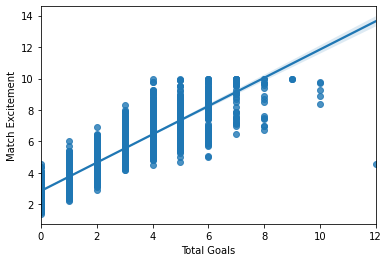

In [17]:
# task3) finding coorelation between match excitement and goals scored in game

sns.regplot(x=df["Total Goals"], y=df['Match Excitement'])
print(df["Total Goals"].corr(df['Match Excitement']))


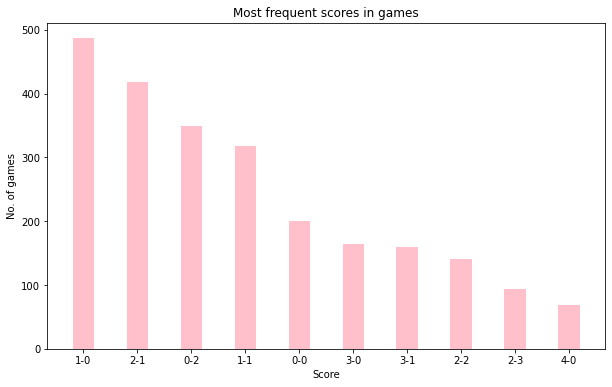

In [18]:
# task4) find which score are most frequent
score_list = []
def score_raw(x):
    if x not in score_list and x[::-1] not in score_list:
        score_list.append(x)
    if x in score_list:
        return x
    if x[::-1] in score_list:
        return x[::-1]
        

df["Score Raw"] = df["Score"].apply(lambda x: score_raw(x))
most_frequent_scores = df.groupby("Score Raw").size().sort_values(ascending=False)[:10]
fig = plt.figure(figsize = (10, 6))

plt.bar(list(most_frequent_scores.index), most_frequent_scores, color ='pink',
        width = 0.4)
 
plt.xlabel("Score")
plt.ylabel("No. of games")
plt.title("Most frequent scores in games")
plt.show()

In [19]:
# task5) find in what proportion of the games situation changed in the second half
    # creating HF Result column
def game_result_hf(df):
    if df["Away Team HT Goals Scored"] < df["Home Team HT Goals Scored"]:
        return "HW"
    elif df["Away Team HT Goals Scored"] > df["Home Team HT Goals Scored"]:
        return "AW"
    else:
        return "D"
df["Home Team HT Goals Scored"] = df["Half Time Score"].apply(lambda x: x.split("-")[0]).astype("int64")
df["Away Team HT Goals Scored"] = df["Half Time Score"].apply(lambda x: x.split("-")[1]).astype("int64")
df["HT Result"]= df.apply(game_result_hf,axis=1)
df["Total Goals HT"] = df["Home Team HT Goals Scored"] + df["Away Team HT Goals Scored"]


Text(0.5, 1.0, 'Situation of games in the second half')

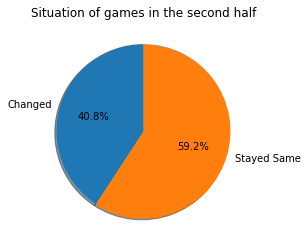

In [20]:
situation_change_sh = (df["Result"]==df["HT Result"])
situation_change_sh = situation_change_sh.groupby(situation_change_sh).size()
plt.pie(situation_change_sh,labels=["Changed",'Stayed Same'],autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Situation of games in the second half')


In [21]:
# task6) Did goals mostly come in first of second half?
total_first_half_goals = df["Total Goals HT"].sum()
total_second_half_goals = df["Total Goals"].sum() - df["Total Goals HT"].sum()
print(total_first_half_goals)
print(total_second_half_goals)



3079
3993


Text(0, 0.5, 'Club')

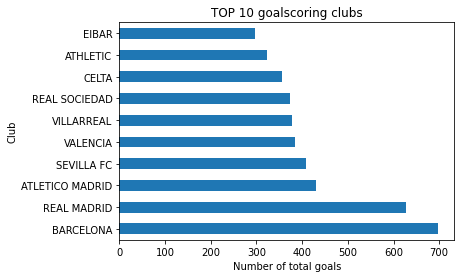

In [28]:
# task7) top10 most goal scoring
home_goals_scored_by_teams = df.groupby("Home Team").sum()["Home Team Goals Scored"].sort_values(ascending=False)
away_goals_scored_by_teams = df.groupby("Away Team").sum()["Away Team Goals Scored"].sort_values(ascending=False)
total_goals_scored_by_teams = (home_goals_scored_by_teams + away_goals_scored_by_teams).sort_values(ascending=False)
total_goals_scored_by_teams[:10].plot.barh()
plt.title('TOP 10 goalscoring clubs')
plt.xlabel('Number of total goals')
plt.ylabel('Club')

In [23]:
# task 8) find the teams that played in all available games(max number of games)

home_games_played_by_teams = df.groupby("Home Team").size()
away_games_played_by_teams = df.groupby("Away Team").size()
total_games_played_by_teams = home_games_played_by_teams + away_games_played_by_teams
total_games_played_by_teams[total_games_played_by_teams==total_games_played_by_teams.max()].index

Index(['ATHLETIC', 'ATLETICO MADRID', 'BARCELONA', 'CELTA', 'EIBAR',
       'REAL MADRID', 'REAL SOCIEDAD', 'SEVILLA FC', 'VALENCIA', 'VILLARREAL'],
      dtype='object', name='Home Team')

In [24]:
# task9) teams that posses ball the most

home_games_ball_possesion = df.groupby("Home Team").mean()["Home Team Possession %"].sort_values(ascending=False)
away_games_ball_possesion = df.groupby("Away Team").mean()["Away Team Possession %"].sort_values(ascending=False)
all_games_ball_possesion = ((home_games_ball_possesion+away_games_ball_possesion) / 2).sort_values(ascending=False)
all_games_ball_possesion[:10]

BARCELONA         66.157895
REAL MADRID       58.755639
LAS PALMAS        56.219298
SEVILLA FC        55.078947
CELTA             54.289474
REAL BETIS        54.241228
REAL SOCIEDAD     54.120301
RAYO VALLECANO    54.087719
VILLARREAL        50.127820
ATHLETIC          50.101504
dtype: float64

0.7331608049937816


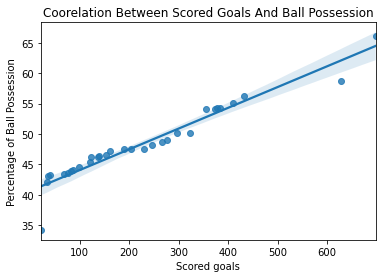

In [25]:
# task9) coorelation between scored goals and ball possession
sns.regplot(x=total_goals_scored_by_teams, y=all_games_ball_possesion)
plt.title('Coorelation Between Scored Goals And Ball Possession')
# Set x-axis label
plt.xlabel('Scored goals')
# Set y-axis label
plt.ylabel('Percentage of Ball Possession')
print(total_goals_scored_by_teams.corr(all_games_ball_possesion))

Text(0, 0.5, 'Match Excicement Score')

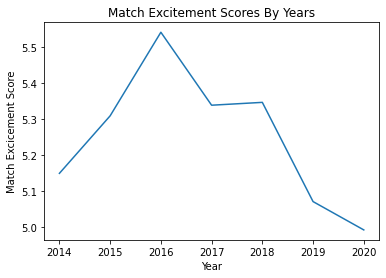

In [26]:
# task10) plot match excitement scores by years
df.groupby("year").mean()["Match Excitement"].plot.line()
plt.title('Match Excitement Scores By Years')
plt.xlabel('Year')
plt.ylabel('Match Excicement Score')

Text(0, 0.5, 'Red cards per game')

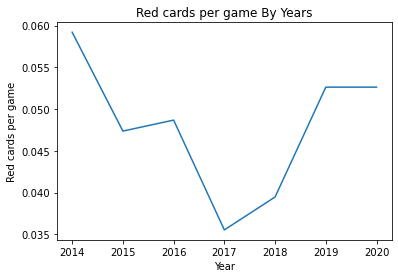

In [27]:
# task11) how aggressive was players during different years (according to red cards shown)
red_cards_per_game = (df.groupby("year").mean()["Home Team Red Cards"] + df.groupby("year").mean()["Away Team Red Cards"])/2
red_cards_per_game.plot.line()
plt.title('Red cards per game By Years')
plt.xlabel('Year')
plt.ylabel('Red cards per game')